In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2457,ham,K.k..how is your sister kids?,NaN,NaN,NaN
4315,ham,"I can't speak, bcaz mobile have problem. I can...",NaN,NaN,NaN
2834,ham,"Ya they are well and fine., BBD(pooja) full pi...",NaN,NaN,NaN
2274,ham,Think I could stop by in like an hour or so? M...,NaN,NaN,NaN
66,ham,"Today is \song dedicated day..\"" Which song wi...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:

# Here we can see that the columns 2 to 4 have so many null values, so those column is not required for this projects
# Drop columns

df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [7]:
df.sample(5)

,v1,v2
5434,ham,Jesus armand really is trying to tell everybod...
1018,ham,Nope watching tv at home... Not going out. V b...
5491,ham,U studying in sch or going home? Anyway i'll b...
3279,ham,Badrith is only for chennai:)i will surely pic...
4389,ham,Do you know why god created gap between your f...


In [8]:
# let's rename the column 

df.rename(columns = {'v1':'target','v2':'text'},inplace = True)

In [9]:
df.sample(5)

,target,text
80,ham,"Sorry, I'll call later"
2714,ham,I am thinking of going down to reg for pract l...
4373,ham,K and you're sure I don't have to have consent...
4879,ham,alright tyler's got a minor crisis and has to ...
3276,ham,Its a great day. Do have yourself a beautiful ...


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [11]:
df['target'] = label_encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep = 'first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## EDA

In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [19]:
import matplotlib.pyplot as plt

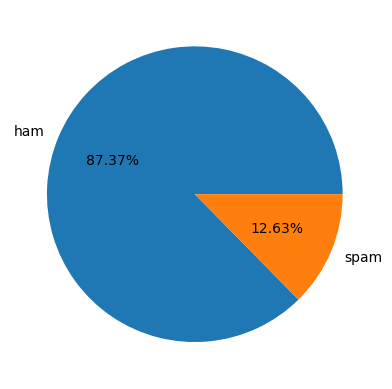

In [20]:
plt.pie(df['target'].value_counts(), labels = ['ham','spam'], autopct = '%0.2f%%')
plt.show()

In [21]:
# So we can see that data is imblance as % of ham is much higher than the spam

In [22]:
!pip install nltk

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters'] = df['text'].apply(len)
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [26]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# ham messagess
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# spam messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_words', ylabel='Count'>

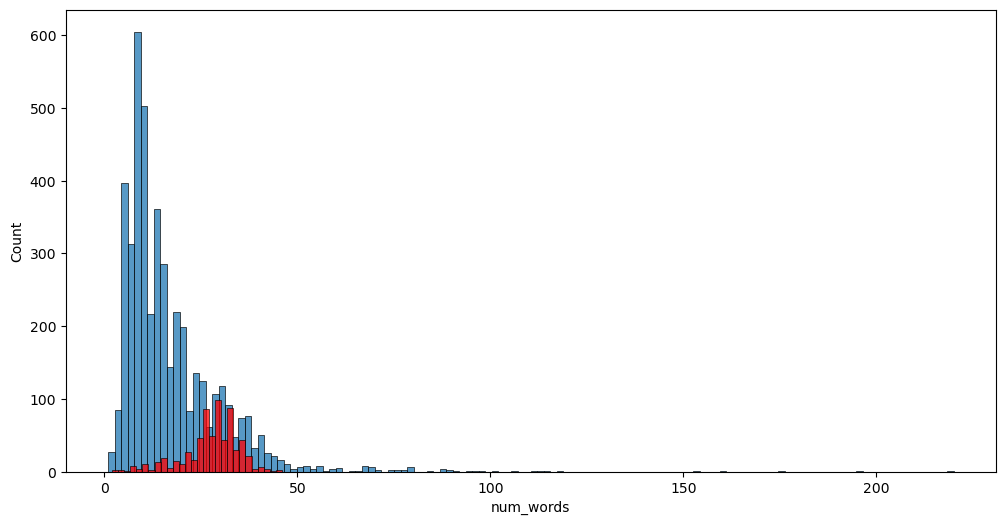

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

<Axes: xlabel='num_characters', ylabel='Count'>

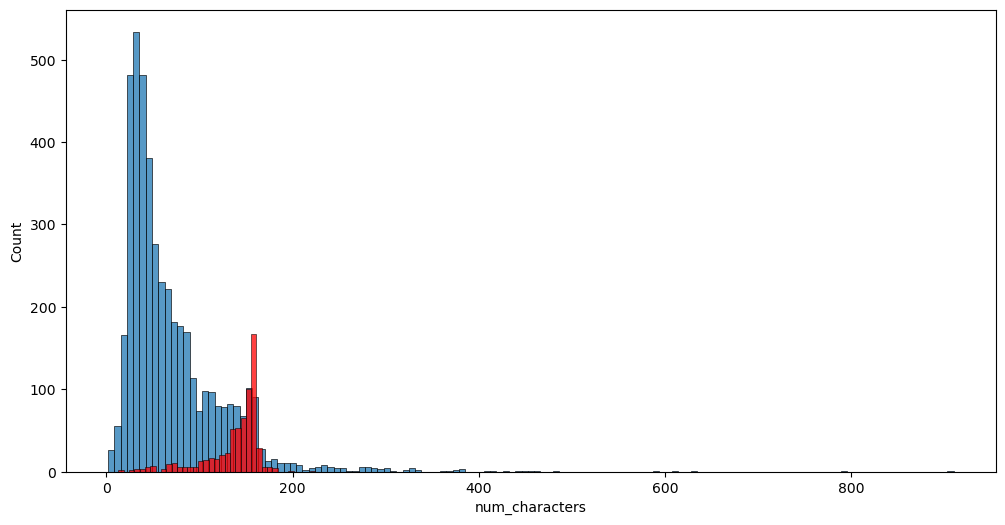

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

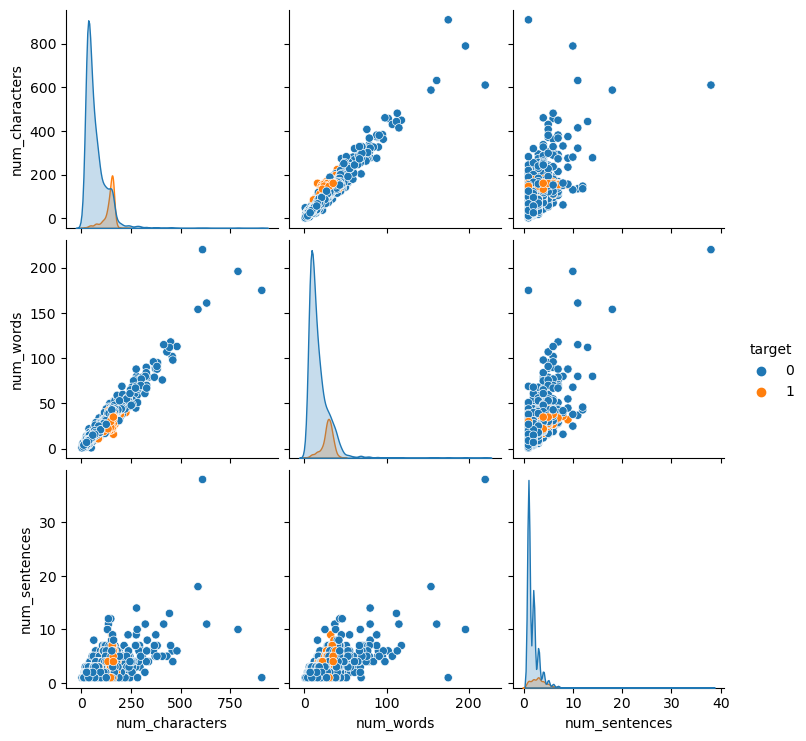

In [36]:
sns.pairplot(df, hue = 'target')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15672\2221401063.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

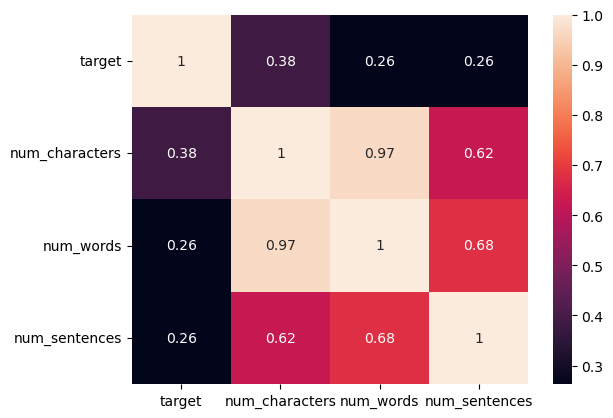

In [37]:
sns.heatmap(df.corr(),annot = True)

In [38]:
# To sum it up, we can see that the column num_characters correlation among those feature is very high , whie building model we 
# will keep this column

## Data Preprocessing

  ### lower case
  ### Tokeniization
  ### Removing special character
  ### Removing stop words and Punctuation
  ### Stemming

In [45]:
def trans_text(text):
    
    text = text.lower()
    text = nltk.word_tokenize(text)
    lst = []
    
    for i in text:
        if i.isalnum():
            lst.append(i)
    temp = lst[:]
    lst.clear()
    for i in temp:
        if i not in stopwords.words('english') and i not in string.punctuation:
            lst.append(i)
    temp = lst[:]
    lst.clear()
    for i in temp:
        lst.append(ps.stem(i))
    
    return " ".join(lst)

In [40]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [41]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
import string

In [47]:
df['transform_text'] = df['text'].apply(trans_text)

In [48]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences,transform_text
3635,0,\ME 2 BABE I FEEL THE SAME LETS JUST 4GET ABOU...,104,22,1,2 babe feel let 4get tri fit soo muchxxlov u
3193,0,And you! Will expect you whenever you text! Ho...,68,15,3,expect whenev text hope goe well tomo
5265,0,Gud ni8.swt drms.take care,26,4,1,gud care
2354,0,R we going with the &lt;#&gt; bus?,36,14,1,r go lt gt bu
161,0,New car and house for my parents.:)i have only...,64,19,2,new car hous parent new job hand


In [49]:
!pip install wordcloud

In [50]:
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height  = 1000, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep =  " "))

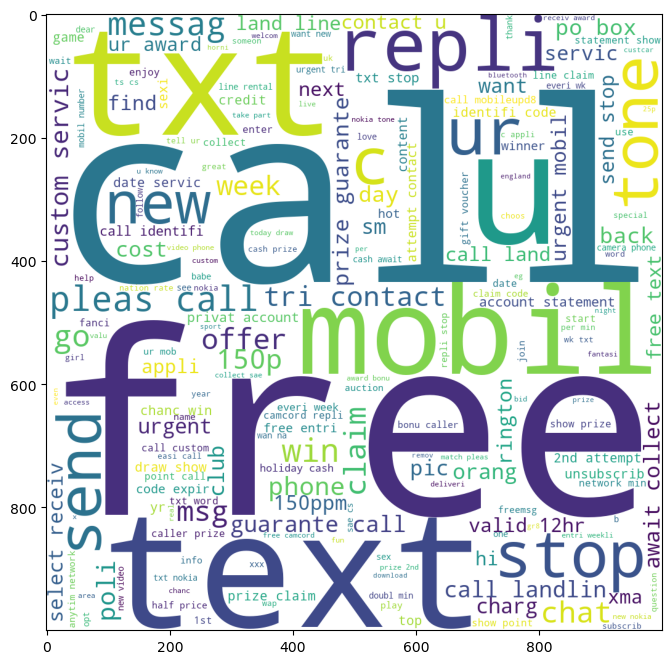

In [51]:
plt.figure(figsize = (15,8))
plt.imshow(spam_wc)

In [52]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep =  " "))

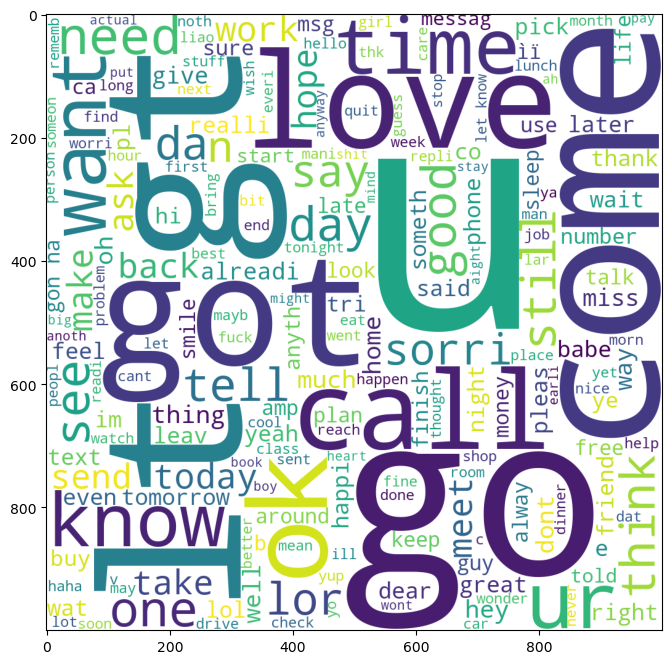

In [53]:
plt.figure(figsize = (15,8))
plt.imshow(ham_wc)

In [54]:
# let's find out top 20 words from each categorie
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
top_ham = []
for i in df[df['target'] == 0]['transform_text'].tolist():
    for j in i.split():
        top_ham.append(j)

In [56]:
len(top_ham)

35404

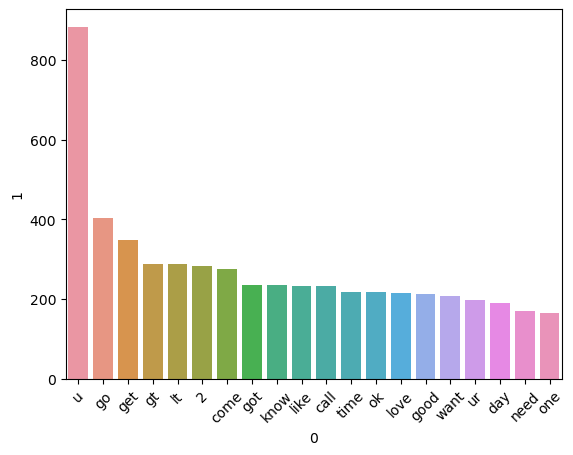

In [57]:
from collections import Counter
temp_df = pd.DataFrame(Counter(top_ham).most_common(20))
sns.barplot(data = temp_df, x = 0, y = 1)
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.show()

In [58]:
top_spam = []
for i in df[df['target'] == 1]['transform_text'].tolist():
    for j in i.split():
        top_spam.append(j)

In [59]:
len(top_spam)

9939

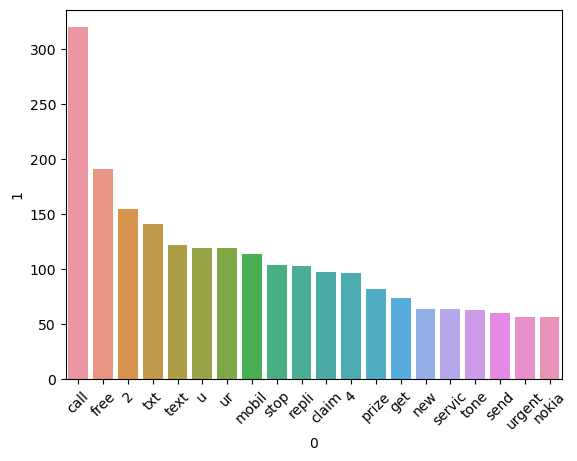

In [60]:
from collections import Counter
temp_df = pd.DataFrame(Counter(top_spam).most_common(20))
sns.barplot(data = temp_df, x = 0, y = 1)
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.show()

In [62]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences,transform_text
4663,0,Mum not going robinson already.,31,6,1,mum go robinson alreadi
2199,0,Not sure I have the stomach for it ...,38,9,1,sure stomach
3829,0,I agree. So i can stop thinkin about ipad. Can...,86,20,3,agre stop thinkin ipad pleas ask macho question
4859,0,"\Response\"" is one of d powerful weapon 2 occu...",80,18,2,one power weapon 2 occupi place other
4169,0,"Mmmmmm ... I love you,so much, Ahmad ... I can...",157,40,5,mmmmmm love much ahmad ca wait year begin ever...


## Model Building

In [66]:
df.rename(columns  = {'tformed_text':'t_text'},inplace = True)

In [67]:
df.head(2)

,target,text,num_characters,num_words,num_sentences,t_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [85]:
# Now let's vectorizing the input text by Bag Of Word for model input as model need neumirical data.

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer()

In [88]:
X = tfidf.fit_transform(df['t_text']).toarray()

In [89]:
X.shape

(5169, 6708)

In [90]:
y = df['target'].values

In [91]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [94]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [95]:
g = GaussianNB()
m = MultinomialNB()
b = BernoulliNB()

In [96]:
g.fit(X_train,y_train)
y_predict = g.predict(X_test)
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(precision_score(y_test,y_predict))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [97]:
m.fit(X_train,y_train)
y_predict2 = m.predict(X_test)
print(accuracy_score(y_test,y_predict2))
print(confusion_matrix(y_test,y_predict2))
print(precision_score(y_test,y_predict2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [98]:
b.fit(X_train,y_train)
y_predict3 = b.predict(X_test)
print(accuracy_score(y_test,y_predict3))
print(confusion_matrix(y_test,y_predict3))
print(precision_score(y_test,y_predict3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
